In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SGD:
    def __init__(self, lr):
        self.lr = lr

    def __call__(self, x):
        return x - self.lr * df(x)

In [3]:
class Momentum:
    def __init__(self, lr):
        self.m = 0
        self.a = 0.9
        self.lr = lr

    def __call__(self, x):
        self.m = self.a*self.m - self.lr * df(x)
        return x + self.m

In [4]:
class Adagrad:
    def __init__(self, lr):
        self.s = 1e-7
        self.lr = lr

    def __call__(self, x):
        g = df(x)
        self.s += g**2
        return x - self.lr/np.sqrt(self.s) * g

In [5]:
class RMSprop:
    def __init__(self, lr):
        self.s = 1e-7
        self.a = 0.9
        self.lr = lr

    def __call__(self, x):
        g = df(x)
        self.s = self.a * self.s + (1-self.a) * g**2
        return x - self.lr/np.sqrt(self.s) * g

In [6]:
class Adam:
    def __init__(self, lr):
        self.m = 0
        self.v = 0
        self.a = 0.9
        self.b = 0.999
        self.step = 1
        self.lr = lr

    def __call__(self, x):
        g = df(x)
        self.m = self.a * self.m + (1-self.a)*g
        self.v = self.b * self.v + (1-self.b)*g**2
        
        nm = self.m / (1-self.a**self.step)
        nv = self.v / (1-self.b**self.step)

        return x - self.lr * nm/np.sqrt(nv)

In [7]:
def dot_generator(x, optimizer, iteration):
    dot_list = []
    for i in range(iteration):
        x = optimizer(x)
        dot_list.append(x)

    return dot_list

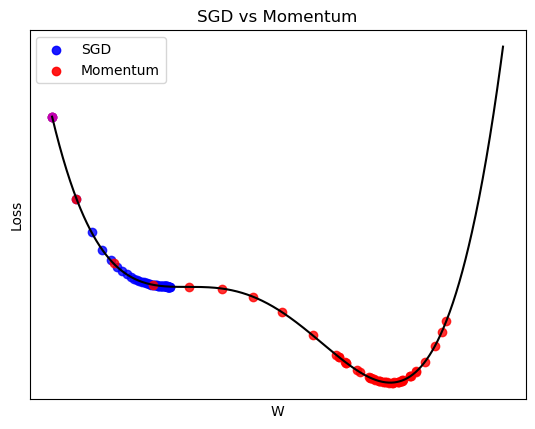

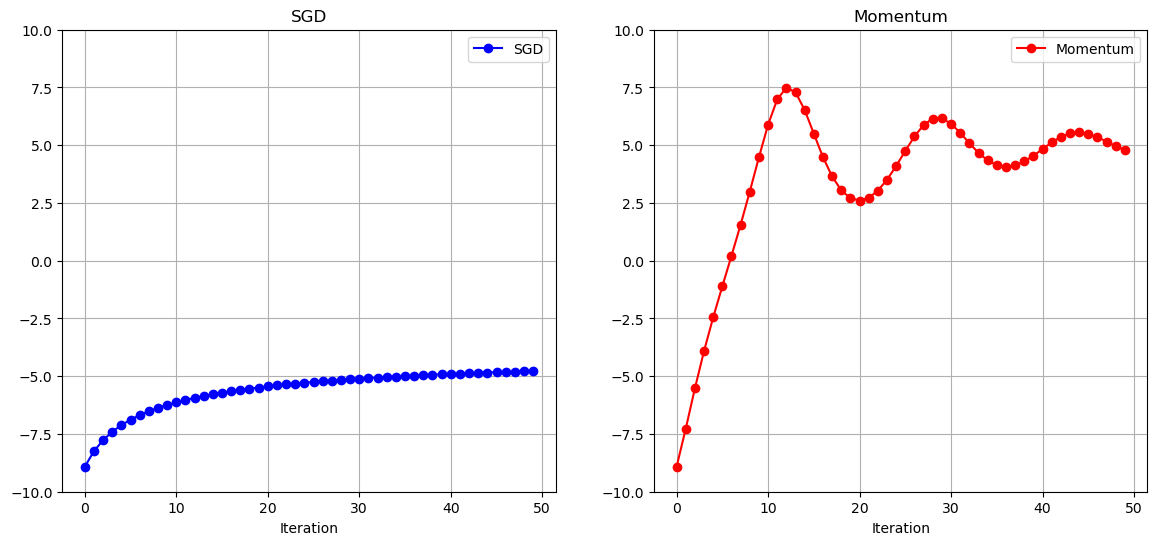

In [8]:
lr = 0.5
sgd = SGD(lr)
sgd_color = 'blue'

momentum = Momentum(lr)
momentum_color = 'red'

x_init = -10.0
iteration = 50


def f(x):
    return ((x-8)**1)*((x+4)**3)*0.001

def df(x):
    return (4*x**3+12*x**2-96*x-320)*0.001


points_sgd = dot_generator(x_init, sgd, iteration)
points_momentum = dot_generator(x_init, momentum, iteration)

x = np.linspace(-10, 10, 1000)
y = f(x)
plt.plot(x, y, c='k')

def dot_plot(dots, c):
    dots = np.array(dots)
    for i, point in enumerate(dots):
        plt.scatter(point, f(point), color=c, alpha=0.8)
    
dot_plot(points_sgd, sgd_color)
dot_plot(points_momentum, momentum_color)

plt.scatter(x_init, f(x_init), color=sgd_color, label='SGD', alpha=0.9)
plt.scatter(x_init, f(x_init), color=momentum_color, label='Momentum', alpha=0.9)
plt.scatter(x_init, f(x_init), color='m', alpha=0.9)


plt.title('SGD vs Momentum')
plt.xlabel('W')
plt.ylabel('Loss')
plt.legend()
plt.tick_params(
    axis='both',
    bottom=False,
    labelbottom=False,
    left=False,
    labelleft=False,)
plt.show()

# Plotting
plt.figure(figsize=(14, 6))

# Plot SGD
plt.subplot(1, 2, 1)
plt.plot(points_sgd, 'o-', label='SGD', color=sgd_color)
plt.title('SGD')
plt.xlabel('Iteration')
plt.ylim(-10,10)
plt.grid(True)
plt.legend()

# Plot Adagrad
plt.subplot(1, 2, 2)
plt.plot(points_momentum, 'o-', label='Momentum', color=momentum_color)
plt.title('Momentum')
plt.xlabel('Iteration')
plt.ylim(-10,10)
plt.grid(True)
plt.legend()

plt.show()


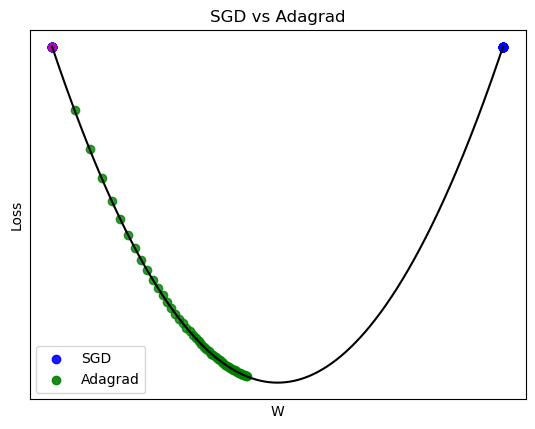

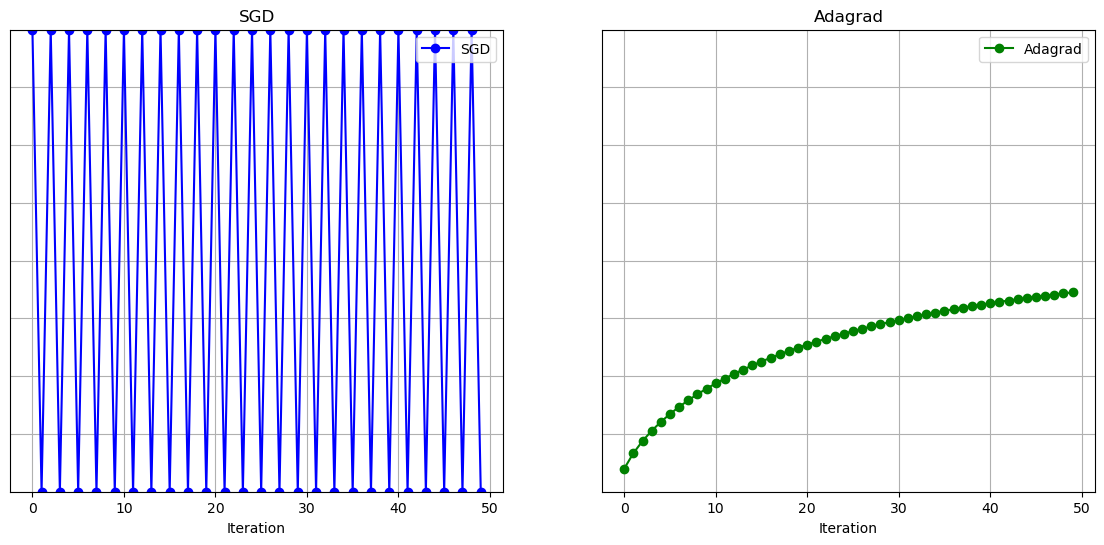

In [9]:
lr = 1.0
sgd = SGD(lr)
sgd_color = 'blue'

adagrad = Adagrad(lr)
adagrad_color = 'green'

x_init = -10.0
iteration = 50

def f(x):
    return x**2

def df(x):
    return 2*x

points_sgd = dot_generator(x_init, sgd, iteration)
points_adagrad = dot_generator(x_init, adagrad, iteration)

x = np.linspace(-10, 10, 1000)
y = f(x)
plt.plot(x, y, c='k')

def dot_plot(dots, c):
    dots = np.array(dots)
    for i, point in enumerate(dots):
        plt.scatter(point, f(point), color=c, alpha=0.8)
    
dot_plot(points_sgd, sgd_color)
dot_plot(points_adagrad, adagrad_color)

plt.scatter(x_init, f(x_init), color=sgd_color, label='SGD', alpha=0.9)
plt.scatter(x_init, f(x_init), color=adagrad_color, label='Adagrad', alpha=0.9)
plt.scatter(x_init, f(x_init), color='m', alpha=0.9)


plt.title('SGD vs Adagrad')
plt.xlabel('W')
plt.ylabel('Loss')
plt.legend()
plt.tick_params(
    axis='both',
    bottom=False,
    labelbottom=False,
    left=False,
    labelleft=False,)
plt.show()

# Plotting
plt.figure(figsize=(14, 6))

# Plot SGD
plt.subplot(1, 2, 1)
plt.plot(points_sgd, 'o-', label='SGD', color=sgd_color)
plt.title('SGD')
plt.xlabel('Iteration')
plt.ylim(-10,10)
plt.tick_params(
    axis='both',
    left=False,
    labelleft=False,)
plt.grid(True)
plt.legend()

# Plot Adagrad
plt.subplot(1, 2, 2)
plt.plot(points_adagrad, 'o-', label='Adagrad', color=adagrad_color)
plt.title('Adagrad')
plt.xlabel('Iteration')
plt.ylim(-10,10)
plt.tick_params(
    axis='both',
    left=False,
    labelleft=False,)
plt.grid(True)
plt.legend()

plt.show()



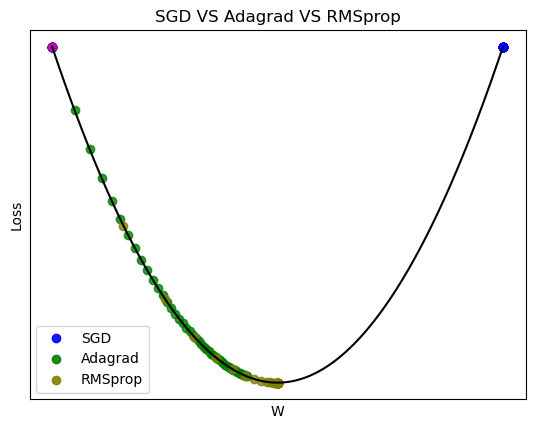

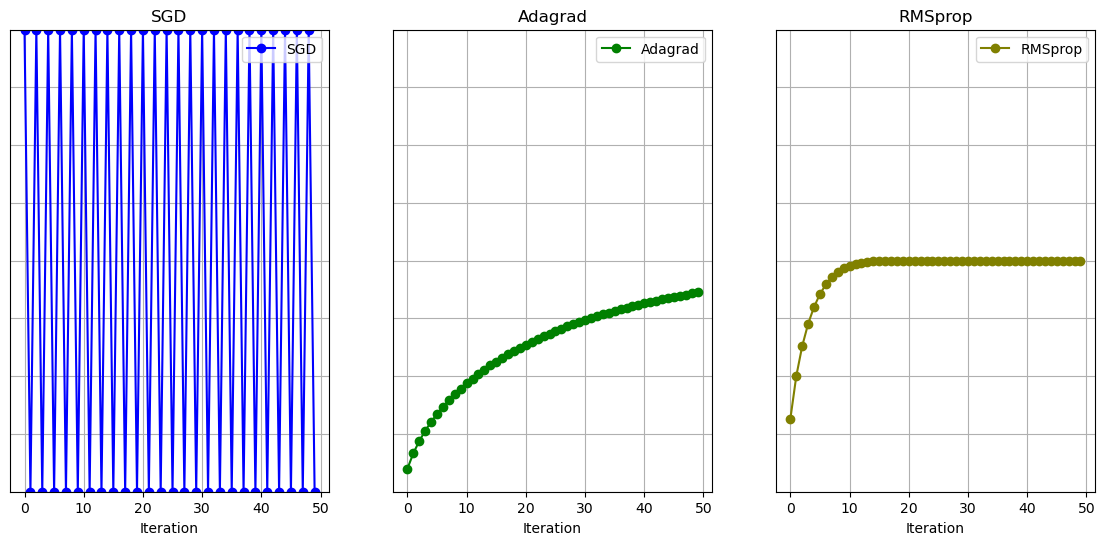

In [10]:
lr = 1.0
sgd = SGD(lr)
sgd_color = 'blue'

adagrad = Adagrad(lr)
adagrad_color = 'green'

rmsprop = RMSprop(lr)
rmsprop_color = 'olive'

x_init = -10.0
iteration = 50

def f(x):
    return x**2

def df(x):
    return 2*x

points_sgd = dot_generator(x_init, sgd, iteration)
points_adagrad = dot_generator(x_init, adagrad, iteration)
points_rmsprop = dot_generator(x_init, rmsprop, iteration)

x = np.linspace(-10, 10, 1000)
y = f(x)
plt.plot(x, y, c='k')

def dot_plot(dots, c):
    dots = np.array(dots)
    for i, point in enumerate(dots):
        plt.scatter(point, f(point), color=c, alpha=0.8)
    
dot_plot(points_sgd, sgd_color)
dot_plot(points_adagrad, adagrad_color)
dot_plot(points_rmsprop, rmsprop_color)

plt.scatter(x_init, f(x_init), color=sgd_color, label='SGD', alpha=0.9)
plt.scatter(x_init, f(x_init), color=adagrad_color, label='Adagrad', alpha=0.9)
plt.scatter(x_init, f(x_init), color=rmsprop_color, label='RMSprop', alpha=0.9)
plt.scatter(x_init, f(x_init), color='m', alpha=0.9)


plt.title('SGD VS Adagrad VS RMSprop')
plt.xlabel('W')
plt.ylabel('Loss')
plt.legend()
plt.tick_params(
    axis='both',
    bottom=False,
    labelbottom=False,
    left=False,
    labelleft=False,)
plt.show()

# Plotting
plt.figure(figsize=(14, 6))

# Plot SGD
plt.subplot(1, 3, 1)
plt.plot(points_sgd, 'o-', label='SGD', color=sgd_color)
plt.title('SGD')
plt.xlabel('Iteration')
plt.ylim(-10,10)
plt.tick_params(
    axis='both',
    left=False,
    labelleft=False,)
plt.grid(True)
plt.legend()

# Plot Adagrad
plt.subplot(1, 3, 2)
plt.plot(points_adagrad, 'o-', label='Adagrad', color=adagrad_color)
plt.title('Adagrad')
plt.xlabel('Iteration')
plt.ylim(-10,10)
plt.tick_params(
    axis='both',
    left=False,
    labelleft=False,)
plt.grid(True)
plt.legend()

# Plot RMSprop
plt.subplot(1, 3, 3)
plt.plot(points_rmsprop, 'o-', label='RMSprop', color=rmsprop_color)
plt.title('RMSprop')
plt.xlabel('Iteration')
plt.ylim(-10,10)
plt.tick_params(
    axis='both',
    left=False,
    labelleft=False,)
plt.grid(True)
plt.legend()

plt.show()

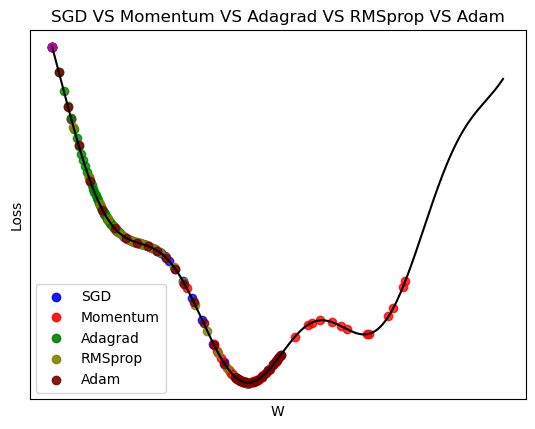

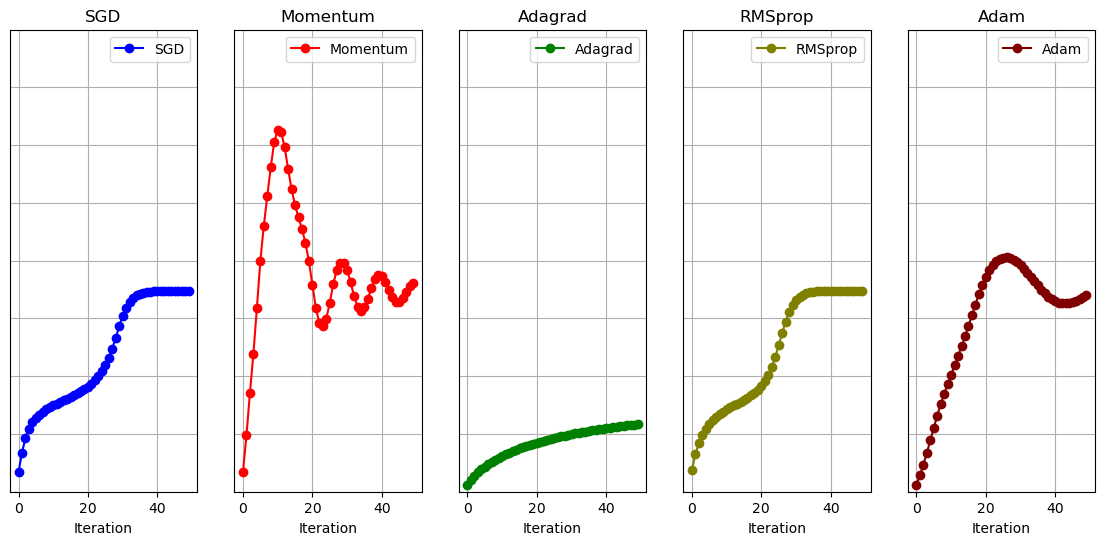

In [11]:
lr = 0.3
sgd = SGD(lr)
sgd_color = 'blue'

momentum = Momentum(lr)
momentum_color = 'red'

adagrad = Adagrad(lr)
adagrad_color = 'green'

rmsprop = RMSprop(lr)
rmsprop_color = 'olive'

adam = Adam(lr)
adam_color = 'maroon'

x_init = -10.0
iteration = 50

def f(x):
    return np.sin(x) + 0.1 * x**2

def df(x):
    return np.cos(x) + 0.2 * x

points_sgd = dot_generator(x_init, sgd, iteration)
points_momentum = dot_generator(x_init, momentum, iteration)
points_adagrad = dot_generator(x_init, adagrad, iteration)
points_rmsprop = dot_generator(x_init, rmsprop, iteration)
points_adam = dot_generator(x_init, adam, iteration)

x = np.linspace(-10, 10, 1000)
y = f(x)
plt.plot(x, y, c='k')

def dot_plot(dots, c):
    dots = np.array(dots)
    for i, point in enumerate(dots):
        plt.scatter(point, f(point), color=c, alpha=0.8)
    
dot_plot(points_sgd, sgd_color)
dot_plot(points_momentum, momentum_color)
dot_plot(points_adagrad, adagrad_color)
dot_plot(points_rmsprop, rmsprop_color)
dot_plot(points_adam, adam_color)

plt.scatter(x_init, f(x_init), color=sgd_color, label='SGD', alpha=0.9)
plt.scatter(x_init, f(x_init), color=momentum_color, label='Momentum', alpha=0.9)
plt.scatter(x_init, f(x_init), color=adagrad_color, label='Adagrad', alpha=0.9)
plt.scatter(x_init, f(x_init), color=rmsprop_color, label='RMSprop', alpha=0.9)
plt.scatter(x_init, f(x_init), color=adam_color, label='Adam', alpha=0.9)
plt.scatter(x_init, f(x_init), color='m', alpha=0.9)


plt.title('SGD VS Momentum VS Adagrad VS RMSprop VS Adam')
plt.xlabel('W')
plt.ylabel('Loss')
plt.legend()
plt.tick_params(
    axis='both',
    bottom=False,
    labelbottom=False,
    left=False,
    labelleft=False,)
plt.show()

# Plotting
plt.figure(figsize=(14, 6))

# Plot SGD
plt.subplot(1, 5, 1)
plt.plot(points_sgd, 'o-', label='SGD', color=sgd_color)
plt.title('SGD')
plt.xlabel('Iteration')
plt.ylim(-10,10)
plt.tick_params(
    axis='both',
    left=False,
    labelleft=False,)
plt.grid(True)
plt.legend()

# Plot Momentum
plt.subplot(1, 5, 2)
plt.plot(points_momentum, 'o-', label='Momentum', color=momentum_color)
plt.title('Momentum')
plt.xlabel('Iteration')
plt.tick_params(
    axis='both',
    left=False,
    labelleft=False,)
plt.ylim(-10,10)
plt.grid(True)
plt.legend()

# Plot Adagrad
plt.subplot(1, 5, 3)
plt.plot(points_adagrad, 'o-', label='Adagrad', color=adagrad_color)
plt.title('Adagrad')
plt.xlabel('Iteration')
plt.ylim(-10,10)
plt.tick_params(
    axis='both',
    left=False,
    labelleft=False,)
plt.grid(True)
plt.legend()

# Plot RMSprop
plt.subplot(1, 5, 4)
plt.plot(points_rmsprop, 'o-', label='RMSprop', color=rmsprop_color)
plt.title('RMSprop')
plt.xlabel('Iteration')
plt.ylim(-10,10)
plt.tick_params(
    axis='both',
    left=False,
    labelleft=False,)
plt.grid(True)
plt.legend()

# Plot Adam
plt.subplot(1, 5, 5)
plt.plot(points_adam, 'o-', label='Adam', color=adam_color)
plt.title('Adam')
plt.xlabel('Iteration')
plt.ylim(-10,10)
plt.tick_params(
    axis='both',
    left=False,
    labelleft=False,)
plt.grid(True)
plt.legend()

plt.show()